
image 1/1 C:\Users\gardi\Desktop\Veri_Bilimi\GITHUB PROJECTS\BDD100K-YOLO\1440x810_cmsv2_1ca9eca1-3edc-566b-af62-8a731e8869f8-6356656.webp: 384x640 5 cars, 2 persons, 1 truck, 58.2ms
Speed: 2.0ms preprocess, 58.2ms inference, 0.1ms postprocess per image at shape (1, 3, 384, 640)


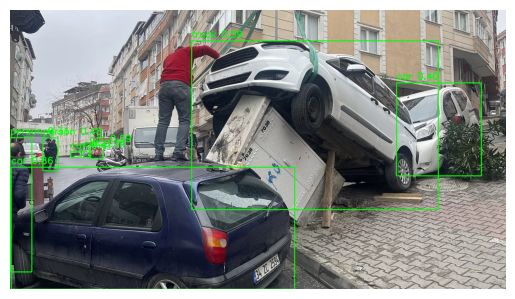

In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Eğitilen modeli yükleme
model = YOLO('runs/detect/train/weights/best.pt')  # Eğitilen modelin yolu

# Tahmin yapma
results = model.predict(source="C:/Users/gardi/Desktop/Veri_Bilimi/GITHUB PROJECTS/BDD100K-YOLO/1440x810_cmsv2_1ca9eca1-3edc-566b-af62-8a731e8869f8-6356656.webp")

# Sonuçları işleme ve görüntüleme
for result in results:
    # Sonuçların görselini elde etme
    img = result.orig_img

    # Bounding box ve etiketlerin çizilmesi
    for box in result.boxes:
        cls = int(box.cls)
        label = model.names[cls]
        conf = float(box.conf)  # Tensor'dan float'a dönüşüm

        # Bounding box koordinatlarını alma ve tamsayıya dönüştürme
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        # Bounding box çizimi
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, f'{label} {conf:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Görüntüyü gösterme
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
